# 1. KNN

In [39]:
from __future__ import print_function
import os
data_path = ['data']

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
# from sklearnex import patch_sklearn
# patch_sklearn()

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [40]:
# Import the data using the file path
filepath = os.sep.join(data_path + ['pd_speech_features.csv'])
data = pd.read_csv(filepath)
data.drop(['id'], axis=1, inplace=True)
X = data.drop(columns='class')
y = data['class']

data.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])

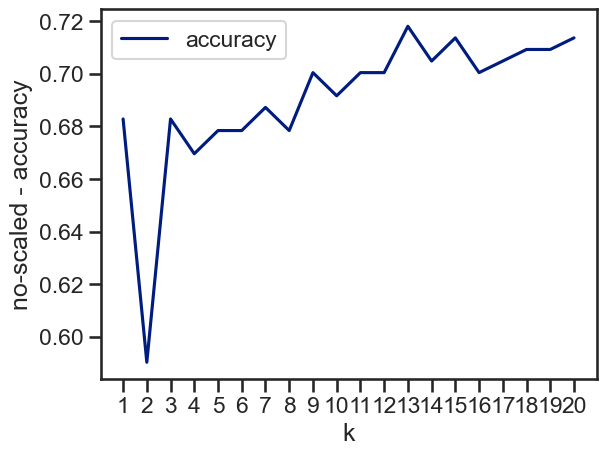

In [43]:
# 1. No-Scaled accuracy test

score_list = list()

for k in range(1, 21):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    score = accuracy(y_test, y_pred)
    
    score_list.append((k, score))
    
score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot()

ax.set(xlabel='k', ylabel='no-scaled - accuracy')
ax.set_xticks(range(1, 21));

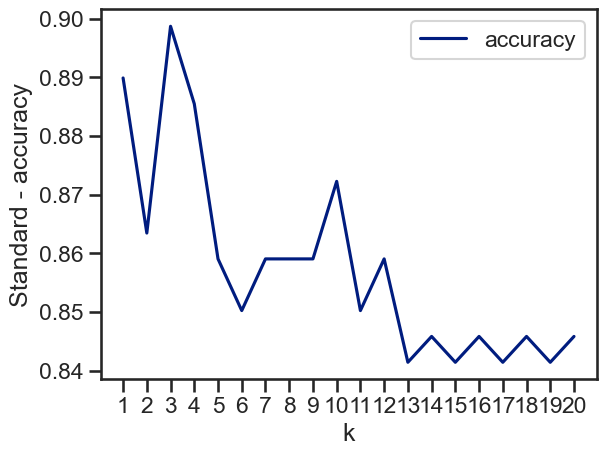

In [44]:
# 2. standardScaler accuracy test

score_list = list()

for k in range(1, 21):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train_std, y_train)
    
    y_pred = knn.predict(X_test_std)
    score = accuracy(y_test, y_pred)
    
    score_list.append((k, score))
    
score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot()

ax.set(xlabel='k', ylabel='Standard - accuracy')
ax.set_xticks(range(1, 21))

In [45]:
knn = KNeighborsClassifier(n_neighbors=3)

knn = knn.fit(X_train_std, y_train)

y_test_pred = knn.predict(X_test_std)

print(accuracy(y_test, y_test_pred))

0.8986784140969163


In [46]:
knn = KNeighborsClassifier(n_neighbors=3, p=1)

knn = knn.fit(X_train_std, y_train)

y_pred = knn.predict(X_test_std)

print(accuracy(y_test, y_pred))

0.8854625550660793


In [47]:
# try to get balanced accuracy about standard scaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred),
                      'balanced accuracy': balanced_accuracy_score(y_true, y_pred)},
                      name=label)

y_train_pred = knn.predict(X_train_std)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.965974,0.898678
precision,0.967980,0.890710
recall,0.987437,0.981928
f1,0.977612,0.934097
balanced accuracy,0.944100,0.827029


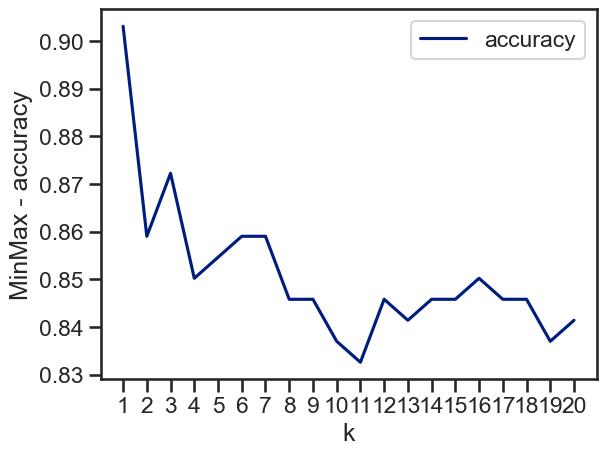

In [48]:
# 3. minMaxScaler accuracy test

score_list = list()

for k in range(1, 21):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train_msc, y_train)
    
    y_pred = knn.predict(X_test_msc)
    score = accuracy(y_test, y_pred)
    
    score_list.append((k, score))
    
score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot()

ax.set(xlabel='k', ylabel='MinMax - accuracy')
ax.set_xticks(range(1, 21))

In [49]:
knn = KNeighborsClassifier(n_neighbors=1)

knn = knn.fit(X_train_msc, y_train)

y_pred = knn.predict(X_test_msc)

print(accuracy(y_test, y_pred))

knn = KNeighborsClassifier(n_neighbors=1, p=1)

knn = knn.fit(X_train_msc, y_train)

y_test_pred = knn.predict(X_test_msc)

print(accuracy(y_test, y_test_pred))

0.9030837004405287
0.9118942731277533


In [50]:
# try to get balanced accuracy about minMax scaler

y_train_pred = knn.predict(X_train_msc)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,1.0,0.911894
precision,1.0,0.945122
recall,1.0,0.933735
f1,1.0,0.939394
balanced accuracy,1.0,0.893097


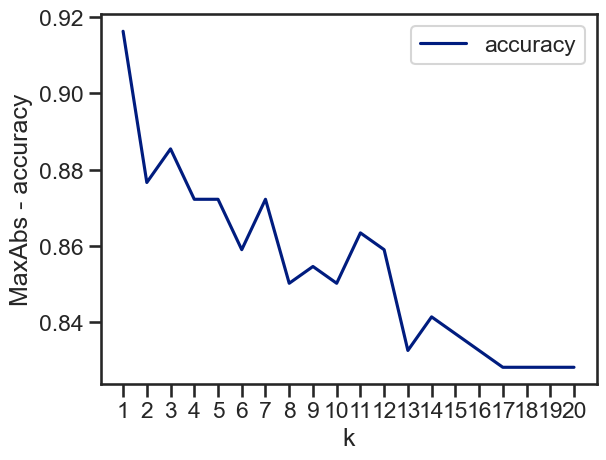

In [51]:
# 4. maxAbsScaler accuracy test

score_list = list()

for k in range(1, 21):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train_maxabs, y_train)
    
    y_pred = knn.predict(X_test_maxabs)
    score = accuracy(y_test, y_pred)
    
    score_list.append((k, score))
    
score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot()

ax.set(xlabel='k', ylabel='MaxAbs - accuracy')
ax.set_xticks(range(1, 21));

In [52]:
knn = KNeighborsClassifier(n_neighbors=1)

knn = knn.fit(X_train_maxabs, y_train)

y_pred = knn.predict(X_test_maxabs)

print(accuracy(y_test, y_pred))

0.9162995594713657


In [53]:
knn = KNeighborsClassifier(n_neighbors=1, p=1)

knn = knn.fit(X_train_maxabs, y_train)

y_test_pred = knn.predict(X_test_maxabs)

print(accuracy(y_test, y_test_pred))

0.9383259911894273


In [54]:
# best = maxAbs
# try to get balanced accuracy about maxAbs

y_train_pred = knn.predict(X_train_maxabs)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,1.0,0.938326
precision,1.0,0.952381
recall,1.0,0.963855
f1,1.0,0.958084
balanced accuracy,1.0,0.916354


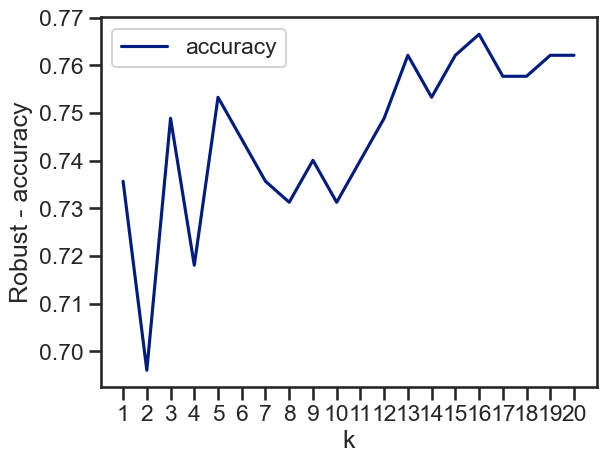

In [55]:
# 5. robustScaler accuracy test

score_list = list()

for k in range(1, 21):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train_rob, y_train)
    
    y_pred = knn.predict(X_test_rob)
    score = accuracy(y_test, y_pred)
    
    score_list.append((k, score))
    
score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot()

ax.set(xlabel='k', ylabel='Robust - accuracy')
ax.set_xticks(range(1, 21))

In [56]:
knn = KNeighborsClassifier(n_neighbors=16)

knn = knn.fit(X_train_rob, y_train)

y_test_pred = knn.predict(X_test_rob)

print(accuracy(y_test, y_test_pred))

0.7665198237885462


In [57]:
# try to get balanced accuracy about robust scaler

y_train_pred = knn.predict(X_train_rob)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.805293,0.766520
precision,0.802875,0.775610
recall,0.982412,0.957831
f1,0.883616,0.857143
balanced accuracy,0.624794,0.601866


# 2. Naive Bayes

In [58]:
from __future__ import print_function
import os
#Data Path has to be set as per the file location in your system
#data_path = ['..', 'data']
data_path = ['data']

#1. data load & handling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.model_selection import cross_validate

msc = MinMaxScaler()
#The filepath is dependent on the data_path set in the previous cell 
filepath = os.sep.join(data_path + ['pd_speech_features.csv'])
data = pd.read_csv(filepath, sep=',', header=0)
data.drop(['id'], axis=1, inplace=True)
data.rename(columns = {'class' : 'result'}, inplace = True)
mms_data = pd.DataFrame(MinMaxScaler().fit_transform(data),  # this is an np.array, not a dataframe.
                    columns=data.columns)
ss_data = pd.DataFrame(StandardScaler().fit_transform(data),  # this is an np.array, not a dataframe.
                    columns=data.columns)

feature_cols = [x for x in data.columns if x not in 'result']

#strat_shuffle을 안한 데이터 셋이 훨씬 성능이 좋게 나옴...
#reason : cross_val_score자체가 k-fold straitified를 보장...
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_idx, test_idx = next(strat_shuff_split.split(data[feature_cols], data['result']))
x_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'result']
x_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'result']
X = data[data.columns[:-1]]
y = data.result

#pipe lining set
pipe_1 = Pipeline([('model',BernoulliNB(alpha=3))])
pipe_2 = Pipeline([('scaler',MinMaxScaler()),('model',BernoulliNB(alpha=3))])
pipe_3 = Pipeline([('scaler',StandardScaler()),('model',BernoulliNB(alpha=3))])
pipe_4 = Pipeline([('model',GaussianNB(var_smoothing=7))])
pipe_5 = Pipeline([('scaler',MinMaxScaler()),('model',GaussianNB(var_smoothing=7))])
pipe_6 = Pipeline([('scaler',StandardScaler()),('model',GaussianNB(var_smoothing=7))])
smoothing = {0.01,1,3,5,8,10,100}
pipes = {'bernoulli+no_scale':pipe_1,'minmax + ber':pipe_2,'stand + bar' : pipe_3,'Gaussian' : pipe_4,'Gaussian + minmax' : pipe_5,'gausian + standard':pipe_6}
scores = {}
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import balanced_accuracy_score
idx=0
metrics = list()
for key, test_pipe in pipes.items():
    y_pred = cross_val_predict(test_pipe, x_train, y_train, cv=134)
    accuracy = accuracy_score(y_train, y_pred)
    bal_accuracy = balanced_accuracy_score(y_train,y_pred)
    print(confusion_matrix(y_train, y_pred))
    scores[key] = accuracy_score(y_train, y_pred)
    precision, recall, fscore, _ = score(y_train, y_pred, average='weighted')
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,'balanced_acc':bal_accuracy}, 
                             name=key))
metrics = pd.concat(metrics, axis=1)    

metrics


[[  0 134]
 [  0 395]]
[[  5 129]
 [  5 390]]
[[ 89  45]
 [101 294]]
[[  0 134]
 [  0 395]]
[[ 45  89]
 [ 15 380]]
[[ 59  75]
 [ 20 375]]


,bernoulli+no_scale,minmax + ber,stand + bar,Gaussian,Gaussian + minmax,gausian + standard
precision,0.557549,0.687752,0.766228,0.557549,0.794977,0.811423
recall,0.746692,0.746692,0.724008,0.746692,0.803403,0.820416
fscore,0.638405,0.654811,0.737330,0.638405,0.774326,0.803075
accuracy,0.746692,0.746692,0.724008,0.746692,0.803403,0.820416
balanced_acc,0.500000,0.512328,0.704241,0.500000,0.648923,0.694833


# 3. SVM

In [59]:
from __future__ import print_function
import os
data_path = [ 'data']

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

import pandas as pd
import numpy as np
# read file
filepath = os.sep.join(data_path + ['pd_speech_features.csv'])
data = pd.read_csv(filepath, sep=',')

# drop 'id' column
data = data.drop('id', axis=1)
data

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,0.000003,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,0.000006,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,0.000004,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,0.000005,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [60]:
y = data['class']
fields = list(data.columns[:-1])
correlations = data[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

tqwt_stdValue_dec_12      -0.393029
tqwt_maxValue_dec_12      -0.391288
tqwt_stdValue_dec_11      -0.391081
tqwt_entropy_log_dec_12   -0.381003
tqwt_maxValue_dec_11      -0.378485
                             ...   
std_9th_delta_delta        0.364333
tqwt_minValue_dec_13       0.365264
tqwt_minValue_dec_11       0.366552
tqwt_minValue_dec_12       0.395740
mean_MFCC_2nd_coef         0.398695
Length: 753, dtype: float64

In [61]:
# feature columns
feature_cols = [x for x in data.columns if x not in 'class']
# Train test split with StratifiedShuffleSplit
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(data[feature_cols], data['class']))

# Create the data sets
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'class']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'class']
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((529, 753), (227, 753), (529,), (227,))

In [62]:
# Label proportion
print(y_train.value_counts(normalize=True).sort_index())
print(y_test.value_counts(normalize=True).sort_index())

0    0.253308
1    0.746692
Name: class, dtype: float64
0    0.255507
1    0.744493
Name: class, dtype: float64


In [63]:
# MinMaxScaler
mmsc = MinMaxScaler()

X_minmax_train = pd.DataFrame(mmsc.fit_transform(X_train), columns=feature_cols)
X_minmax_test = pd.DataFrame(mmsc.transform(X_test), columns=feature_cols)
X_minmax_train

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,1.0,0.717368,0.928834,0.685291,0.227778,0.234160,0.569466,0.035103,0.196078,0.171286,...,0.001253,0.001096,0.017467,0.017630,0.016304,0.024077,0.040765,0.040284,0.058379,0.021953
1,1.0,0.900625,0.394121,0.649490,0.268056,0.274105,0.481645,0.030425,0.092593,0.073551,...,0.000851,0.004109,0.334035,0.545107,0.635907,0.771423,0.806359,0.696448,0.725671,0.762038
2,0.0,0.900197,0.379072,0.153789,0.436111,0.440771,0.256773,0.003687,0.014524,0.009007,...,0.381417,0.275101,0.324983,0.261984,0.087155,0.047391,0.043529,0.028637,0.032050,0.003375
3,1.0,0.905174,0.301318,0.560331,0.243056,0.249311,0.532487,0.015697,0.032680,0.030079,...,0.001038,0.001421,0.005503,0.010652,0.013160,0.020005,0.039187,0.026685,0.017500,0.008683
4,0.0,0.913937,0.318373,0.280273,0.347222,0.352617,0.355249,0.011089,0.026870,0.019054,...,0.024832,0.584298,0.584802,0.616315,0.723429,0.934462,0.901537,0.824702,0.885593,0.769444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,1.0,0.359192,0.900676,0.683034,0.208333,0.214876,0.615728,0.066226,0.281046,0.257684,...,0.001116,0.000312,0.013187,0.183655,0.173538,0.153170,0.214697,0.691071,0.759223,0.417778
525,0.0,0.928762,0.006923,0.440805,0.565278,0.568871,0.160398,0.012961,0.013072,0.006153,...,0.739682,0.721640,0.771483,0.858765,0.857194,0.806341,0.765640,0.653818,0.388005,0.006631
526,1.0,0.903292,0.524982,0.622070,0.237500,0.243802,0.541684,0.028198,0.064633,0.056741,...,0.001386,0.000945,0.044032,0.017818,0.013503,0.016896,0.019738,0.076578,0.082092,0.031648
527,0.0,0.912990,0.645910,0.461898,0.438889,0.443526,0.254432,0.018203,0.038126,0.021400,...,0.278231,0.239727,0.317335,0.314255,0.095970,0.075010,0.084877,0.502512,0.807987,0.764781


In [64]:
# StandardScaler
stdsc = StandardScaler()

X_standard_train = pd.DataFrame(stdsc.fit_transform(X_train), columns=feature_cols)
X_standard_test = pd.DataFrame(stdsc.transform(X_test), columns=feature_cols)
X_standard_train

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,0.961060,-0.523756,1.851295,1.005378,-0.829721,-0.824966,0.846335,-0.343173,1.094912,1.055203,...,-0.468858,-0.604355,-0.582675,-0.598357,-0.536424,-0.490521,-0.499304,-0.689215,-0.702862,-0.790164
1,0.961060,0.447063,-0.424657,0.828423,-0.532341,-0.528118,0.385059,-0.365631,0.111419,0.069853,...,-0.471066,-0.590013,0.963551,1.857822,2.491616,2.891754,2.724397,1.761654,1.576951,1.749492
2,-1.040518,0.444800,-0.488712,-1.621665,0.708451,0.710453,-0.796066,-0.493999,-0.630515,-0.580872,...,1.619098,0.699845,0.919336,0.539470,-0.190170,-0.385008,-0.487669,-0.732718,-0.792816,-0.853915
3,0.961060,0.471162,-0.819664,0.387739,-0.716922,-0.712368,0.652104,-0.436337,-0.457972,-0.368431,...,-0.470042,-0.602806,-0.641111,-0.630850,-0.551787,-0.508946,-0.505949,-0.740008,-0.842526,-0.835700
4,-1.040518,0.517587,-0.747068,-0.996493,0.052164,0.055341,-0.278828,-0.458462,-0.513186,-0.479578,...,-0.339358,2.171545,2.188379,2.189402,2.919339,3.629624,3.125163,2.240701,2.123328,1.774908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,0.961060,-2.421234,1.731441,0.994221,-0.973283,-0.968271,1.089320,-0.193756,1.902412,1.926252,...,-0.469611,-0.608085,-0.603580,0.174731,0.231989,0.093718,0.233072,1.741571,1.691581,0.568141
525,-1.040518,0.596124,-2.072725,-0.203036,1.662117,1.662412,-1.302270,-0.449474,-0.644318,-0.609644,...,3.586780,2.825257,3.100195,3.318361,3.573057,3.049783,2.552939,1.602425,0.423310,-0.842740
526,0.961060,0.461192,0.132339,0.692899,-0.757939,-0.753313,0.700409,-0.376321,-0.154297,-0.099627,...,-0.468132,-0.605070,-0.452922,-0.597485,-0.550113,-0.523018,-0.587846,-0.553654,-0.621847,-0.756894
527,-1.040518,0.512571,0.647058,-0.098782,0.728959,0.730925,-0.808360,-0.424307,-0.406209,-0.455930,...,1.052373,0.531472,0.881979,0.782869,-0.147093,-0.260011,-0.313563,1.037275,1.858186,1.758907


In [65]:
# Specificity score function
def specificity_score(y_true, y_pred):
    cf = confusion_matrix(y_true, y_pred)
    return cf[0,0]/(cf[0,0]+cf[0,1])

# Error measure function
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'specificity': specificity_score(y_true, y_pred),
                      'balanced accuracy': balanced_accuracy_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [66]:
# Linear SVM with no-scaling
LSVC = LinearSVC()
LSVC.fit(X_train, y_train)

y_train_pred = LSVC.predict(X_train)
y_test_pred = LSVC.predict(X_test)

print(confusion_matrix(y_true=y_test, y_pred=y_test_pred))

train_test_error = pd.concat([measure_error(y_train, y_train_pred, 'train'), 
                              measure_error(y_test, y_test_pred, 'test')], axis=1)
train_test_error

[[ 57   1]
 [165   4]]


,train,test
accuracy,0.258979,0.268722
precision,1.000000,0.800000
recall,0.007595,0.023669
specificity,1.000000,0.982759
balanced accuracy,0.503797,0.503214
f1,0.015075,0.045977


In [67]:
# Linear SVM with MinMaxScaler
LSVC = LinearSVC(max_iter=10000)
LSVC.fit(X_minmax_train, y_train)

y_minmax_train_pred = LSVC.predict(X_minmax_train)
y_minmax_test_pred = LSVC.predict(X_minmax_test)

print(confusion_matrix(y_true=y_test, y_pred=y_minmax_test_pred))

minmax_train_test_error = pd.concat([measure_error(y_train, y_minmax_train_pred, 'minmax_train'), 
                                     measure_error(y_test, y_minmax_test_pred, 'minmax_test')], axis=1)
minmax_train_test_error

[[ 38  20]
 [  8 161]]


,minmax_train,minmax_test
accuracy,1.0,0.876652
precision,1.0,0.889503
recall,1.0,0.952663
specificity,1.0,0.655172
balanced accuracy,1.0,0.803918
f1,1.0,0.920000


In [68]:
# Linear SVM with StandardScaler
LSVC = LinearSVC(max_iter=10000)
LSVC.fit(X_standard_train, y_train)

y_standard_train_pred = LSVC.predict(X_standard_train)
y_standard_test_pred = LSVC.predict(X_standard_test)

print(confusion_matrix(y_true=y_test, y_pred=y_standard_test_pred))

standard_train_test_error = pd.concat([measure_error(y_train, y_standard_train_pred, 'standard_train'), 
                                       measure_error(y_test, y_standard_test_pred, 'standard_test')], axis=1)
standard_train_test_error

[[ 38  20]
 [ 19 150]]


,standard_train,standard_test
accuracy,1.0,0.828194
precision,1.0,0.882353
recall,1.0,0.887574
specificity,1.0,0.655172
balanced accuracy,1.0,0.771373
f1,1.0,0.884956


In [69]:
# Gaussian kernel SVM with no-scaling
SVC_Gaussian = SVC(kernel='rbf')
GS = GridSearchCV(SVC_Gaussian, 
                  param_grid={
                      'gamma':[0.0001, 0.001, 0.01, 0.1, 1, 10], 
                      'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}, 
                  scoring=['accuracy', 'recall', 'balanced_accuracy'],
                  refit='balanced_accuracy')

GS.fit(X_train, y_train)

GS.best_params_, GS.best_score_

({'C': 0.0001, 'gamma': 0.0001}, 0.5)

In [70]:
# Best model of Gaussian Kernel SVM with no-scaling
SVC_Gaussian = SVC(kernel='rbf', gamma=0.0001, C=0.0001)
SVC_Gaussian.fit(X_train, y_train)

y_train_pred = SVC_Gaussian.predict(X_train)
y_test_pred = SVC_Gaussian.predict(X_test)

print(confusion_matrix(y_true=y_test, y_pred=y_test_pred))

train_test_error = pd.concat([measure_error(y_train, y_train_pred, 'train'), 
                              measure_error(y_test, y_test_pred, 'test')], axis=1)
train_test_error

[[  0  58]
 [  0 169]]


,train,test
accuracy,0.746692,0.744493
precision,0.746692,0.744493
recall,1.000000,1.000000
specificity,0.000000,0.000000
balanced accuracy,0.500000,0.500000
f1,0.854978,0.853535


In [71]:
# Gaussian kernel SVM with MinMaxScaler
SVC_Gaussian = SVC(kernel='rbf')
GS = GridSearchCV(SVC_Gaussian, 
                  param_grid={
                      'gamma':[0.0001, 0.001, 0.01, 0.1, 1, 10], 
                      'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}, 
                  scoring=['accuracy', 'recall', 'balanced_accuracy'],
                  refit='balanced_accuracy')

GS.fit(X_minmax_train, y_train)

GS.best_params_, GS.best_score_

({'C': 10, 'gamma': 0.1}, 0.830267950521115)

In [72]:
# Gaussian kernel SVM with StandardScaler
SVC_Gaussian = SVC(kernel='rbf')
GS = GridSearchCV(SVC_Gaussian, 
                  param_grid={
                      'gamma':[0.0001, 0.001, 0.01, 0.1, 1, 10], 
                      'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}, 
                  scoring=['accuracy', 'recall', 'balanced_accuracy'],
                  refit='balanced_accuracy')

GS.fit(X_standard_train, y_train)

GS.best_params_, GS.best_score_

({'C': 10, 'gamma': 0.001}, 0.7866168992751271)

In [73]:
# Gaussian kernel SVM with MinMaxScaler, gamma=0.1, C=10
SVC_Gaussian = SVC(kernel='rbf', gamma=0.1, C=10)
SVC_Gaussian.fit(X_minmax_train, y_train)

y_minmax_train_pred = SVC_Gaussian.predict(X_minmax_train)
y_minmax_test_pred = SVC_Gaussian.predict(X_minmax_test)

print(confusion_matrix(y_true=y_test, y_pred=y_minmax_test_pred))

minmax_train_test_error = pd.concat([measure_error(y_train, y_minmax_train_pred, 'minmax_train'), 
                                     measure_error(y_test, y_minmax_test_pred, 'minmax_test')], axis=1)
minmax_train_test_error

[[ 44  14]
 [  4 165]]


,minmax_train,minmax_test
accuracy,1.0,0.920705
precision,1.0,0.921788
recall,1.0,0.976331
specificity,1.0,0.758621
balanced accuracy,1.0,0.867476
f1,1.0,0.948276


# 4. Decision Tree

In [5]:
from __future__ import print_function
import os
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
data_path = ['./']
filepath = os.sep.join(data_path + ['pd_speech_features.csv'])
data = pd.read_csv(filepath, sep=',', header=0)
data.head()
data= data.drop('id',axis=1)
# from sklearnex import patch_sklearn
# patch_sklearn()

In [6]:
# All data columns except for class
feature_cols = [x for x in data.columns if x not in 'class']

In [7]:
# Split the data into two parts with 1000 points in the test data
# This creates a generator
strat_shuff_split = StratifiedShuffleSplit(n_splits=5, train_size=0.7, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(data[feature_cols], data['class']))

# Create the data sets
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'class']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'class']
print(y_train.value_counts(normalize=True).sort_index())
print(y_test.value_counts(normalize=True).sort_index())

0    0.253308
1    0.746692
Name: class, dtype: float64
0    0.255507
1    0.744493
Name: class, dtype: float64


## Decision Tree - baseline

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
def specificity_score(y_true, y_pred):
    cf = confusion_matrix(y_true, y_pred)
    return cf[0,0]/(cf[0,0]+cf[0,1])

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'specificity': specificity_score(y_true, y_pred),
                      'balancedAccuracyScore':balanced_accuracy_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                     name=label)

In [9]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)
print(dt.tree_.node_count, dt.tree_.max_depth)
# The error on the training and test data sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))
train_test_full_error

67 12
[[134   0]
 [  0 395]]
[[ 36  22]
 [ 25 144]]


,train,test
accuracy,1.0,0.792952
precision,1.0,0.867470
recall,1.0,0.852071
specificity,1.0,0.620690
balancedAccuracyScore,1.0,0.736380
f1,1.0,0.859701


In [10]:
#gridSearchCV
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)
print(GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth)

y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)
print(confusion_matrix(y_train, y_train_pred_gr))
print(confusion_matrix(y_test, y_test_pred_gr))
train_test_gr_error

31 5
[[112  22]
 [  4 391]]
[[ 35  23]
 [ 12 157]]


,train,test
accuracy,0.950851,0.845815
precision,0.946731,0.872222
recall,0.989873,0.928994
specificity,0.835821,0.603448
balancedAccuracyScore,0.912847,0.766221
f1,0.967822,0.899713


In [11]:
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1),
              'max_features': range(1, len(dt.feature_importances_)+1),
              'min_samples_split':range(1,5),
              'min_samples_leaf':range(1,5),
              }
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1),
              'max_features': range(1, len(dt.feature_importances_)+1),
              }

In [12]:

GR2 = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR2 = GR2.fit(X_train, y_train)
print(GR2.best_estimator_.tree_.node_count, GR2.best_estimator_.tree_.max_depth)

y_train_pred_gr2 = GR2.predict(X_train)
y_test_pred_gr2 = GR2.predict(X_test)

train_test_gr_error2 = pd.concat([measure_error(y_train, y_train_pred_gr2, 'train'),
                                 measure_error(y_test, y_test_pred_gr2, 'test')],
                                axis=1)
print(confusion_matrix(y_train, y_train_pred_gr2))
print(confusion_matrix(y_test, y_test_pred_gr2))
train_test_gr_error2

37 6
[[112  22]
 [  1 394]]
[[ 32  26]
 [ 13 156]]


,train,test
accuracy,0.956522,0.828194
precision,0.947115,0.857143
recall,0.997468,0.923077
specificity,0.835821,0.551724
balancedAccuracyScore,0.916645,0.737401
f1,0.971640,0.888889
